## This is the script to compute the morton codes and plot them. For compuing, it read 6 mean roi values, feed to zCuve model to compute one big number out, so there will be one number for each frame at the end. Then plot these numbers, so one plot for each sequence.  

In [1]:
import zCurve as z
import csv
import os
import numpy as np
import pandas as pd
import glob
import json 
import matplotlib.pyplot as plt

In [99]:
def calculateMortonFromList_with_zCurve(values):
    # Cap floating point numbers to one decimal place and convert to integers
    int_values = [int(round(value, 1) * 10) for value in values]
    value = z.interlace(*int_values, dims=len(int_values))
    return value  

In [100]:
roi_mean_values = pd.read_csv('../outputs/smirk_roi_mean_values.csv')
roi_mean_values

,frame,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6
0,child/Y4kC5HWcultxGWAhuKdZw/cam000006.png,0.002120,0.028477,4.688508,0.375582,0.316727,0.124537
1,child/XpIss6USqq1CvIRb2weqE/cam000280.png,0.002110,0.000000,2.135890,0.193213,0.324183,0.152763
2,child/BLt5th4KUYDe4tqqwQEbN/cam000128.png,0.000000,0.000000,3.505804,0.553993,0.531435,0.161224
3,child/1zJO0PfH4rKy8MOl5x5di/cam000035.png,0.000699,0.000000,0.040380,28.866972,11.626774,0.130466
4,child/0i0Pv5GElXKQI1OoIHfbY/cam000025.png,8.619019,30.753439,0.462520,0.417660,0.377722,0.113543
...,...,...,...,...,...,...,...
69296,child/FUTcU9qixnZnRtUKfR73U/cam000022.png,0.000000,0.000000,0.891905,2.648956,0.357865,0.112293
69297,child/Hg5IVmPBKY2WzuemE7p6J/cam000033.png,0.000320,0.000000,0.100777,2.350223,0.330376,0.116829
69298,child/4C874IC44CDuep4rdQFIN/cam000171.png,0.000283,0.000000,0.047996,29.854540,1.106992,0.164594
69299,child/kJEr4oDRPCYEqv6dQgu6o/cam000043.png,0.000000,0.000000,33.496441,0.542867,0.287053,0.116550


In [101]:
cell_columns = [col for col in roi_mean_values.columns if col.startswith("cell")]
cell_columns

['cell_1', 'cell_2', 'cell_3', 'cell_4', 'cell_5', 'cell_6']

In [102]:
for _, row in roi_mean_values.iterrows():
    print('frame_roi: \n', row)
    value = calculateMortonFromList_with_zCurve(row[col] for col in cell_columns)
    print('morton: \n ', value)
    break

frame_roi: 
 frame     child/Y4kC5HWcultxGWAhuKdZw/cam000006.png
cell_1                                      0.00212
cell_2                                     0.028477
cell_3                                     4.688508
cell_4                                     0.375582
cell_5                                     0.316727
cell_6                                     0.124537
Name: 0, dtype: object
morton: 
  4296066356


In [6]:
cell_columns = [col for col in roi_mean_values.columns if col.startswith("cell")]
morton_codes = []
# i=0
for _, row in roi_mean_values.iterrows():
    value = calculateMortonFromList_with_zCurve(row[col] for col in cell_columns)
    frame = row['frame']
    morton_codes.append({'frame': frame, 'morton': value})
#     i+=1
#     if i > 30:
#         break
# print(morton_codes)
morton_codes = pd.DataFrame(morton_codes, columns=['frame', 'morton'])
morton_codes.to_csv('../outputs/morton_codes_all.csv', sep=';', index=False)

### Above is giving the 6 roi cell vlaues all to the SFC, no other processes to the roi_mean_values. 

### However, originally there is a process to roi_mean_valaues are only keep the maximum cell_values of threshhold 0.2, then put all other cell_valeus to 0. Then feed all values to the SFC. In following, do this process. 

In [7]:
threshold = 0.2
def morton_computing(row):
    cell_values_frame = row[1:]
    max_ind = np.argmax(cell_values_frame)
    cell_values_frame_0 = np.zeros_like(cell_values_frame)
    cell_values_frame_0[max_ind] = cell_values_frame[max_ind] if cell_values_frame[max_ind] > threshold else 0.0
    morton_value_frame = calculateMortonFromList_with_zCurve(cell_values_frame_0)
    frame = row[0]
    return frame, morton_value_frame

In [8]:
roi_values_numpy = roi_mean_values.to_numpy()
morton_codes = []
for i in range(len(roi_values_numpy)):
    frame, morton_value_frame = morton_computing(roi_values_numpy[i])
    morton_codes.append({'frame': frame, 'morton': morton_value_frame})

morton_codes = pd.DataFrame(morton_codes, columns=['frame', 'morton'])
morton_codes.to_csv('../outputs/morton_codes_all_max_cell_only.csv', index=False)

## Plotting
### When saving morton codes, it is one csv with all frmaes. The plotting of the morton is sequence based. Same as ROI plotting

In [9]:
import os
import csv
import numpy as np
import pandas as pd
import glob
import json 
import matplotlib.pyplot as plt

In [10]:
morton_codes = pd.read_csv('../outputs/morton_codes_all_max_cell_only.csv')
morton_codes

,frame,morton
0,child/Y4kC5HWcultxGWAhuKdZw/cam000006.png,4296032516
1,child/XpIss6USqq1CvIRb2weqE/cam000280.png,67125252
2,child/BLt5th4KUYDe4tqqwQEbN/cam000128.png,4294967556
3,child/1zJO0PfH4rKy8MOl5x5di/cam000035.png,2251808403619848
4,child/0i0Pv5GElXKQI1OoIHfbY/cam000025.png,562952134467584
...,...,...
69296,child/FUTcU9qixnZnRtUKfR73U/cam000022.png,136315392
69297,child/Hg5IVmPBKY2WzuemE7p6J/cam000033.png,136314880
69298,child/4C874IC44CDuep4rdQFIN/cam000171.png,2251808405717512
69299,child/kJEr4oDRPCYEqv6dQgu6o/cam000043.png,1126174785814788


In [11]:
smirk_child = '../datasets/smirk/child/'

Z8CrcBAx3TYsVgtucXJUV
[[54.9755813888], [0.872624948], [0.872415284], [54.975794432], [54.9757943808], [0.8726282752], [55.8347845632], [54.975791156], [54.9755813896], [0.872415232], [0.0136314888], [0.8589935112], [0.8592031744], [0.0134217736], [0.000212992], [3.3288e-06], [0.0134217736], [0.000213044], [0.0002130432], [0.0134217736], [0.000212992], [0.000209716], [0.0002097664], [0.000212992], [0.000209716], [3.3288e-06], [0.0002129928], [0.0001048832], [0.0001064964], [0.0067109124], [0.0001064964], [0.0068174084], [0.0067108864], [0.006710912], [0.0068157444], [0.006817408], [0.4294967296]]


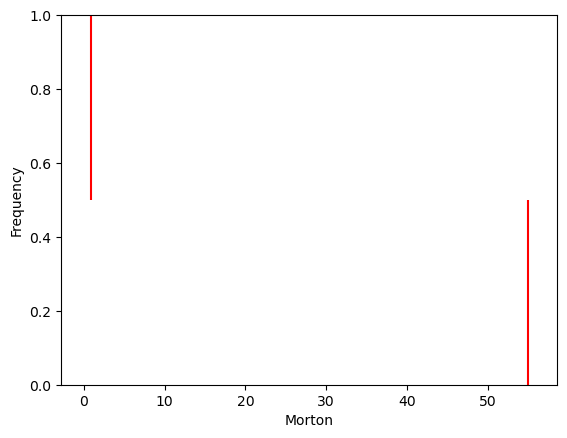

In [44]:
_, ax1 = plt.subplots()
ax1.set_xlabel("Morton")
ax1.set_ylabel("Frequency")
ax1.set_ylim((0, 1))
mortons_seq = []
for seq in os.listdir(smirk_child):
    print(seq)
    if os.path.isdir(os.path.join(smirk_child, seq)): # reason for this is there is a labels.csv file in /child, need to skip it.
        for anno_frame in sorted(glob.glob(os.path.join(smirk_child, seq, '*.labels.png'))):
            rgb_frame = anno_frame.replace('.labels.png', '.png').replace('../datasets/smirk/child', 'child')
            morton_frame = morton_codes.set_index('frame').loc[rgb_frame].values.astype(float) / 10000000000
            mortons_seq.append(list(morton_frame))
       
        print(mortons_seq)
        ax1.eventplot(mortons_seq, orientation='horizontal', colors="red",lineoffsets=1,linelengths=1)


        break

Z8CrcBAx3TYsVgtucXJUV
[[54975581.3888], [872624.948], [872415.284], [54975794.432], [54975794.3808], [872628.2752], [55834784.5632], [54975791.156], [54975581.3896], [872415.232], [13631.4888], [858993.5112], [859203.1744], [13421.7736], [212.992], [3.3288], [13421.7736], [213.044], [213.0432], [13421.7736], [212.992], [209.716], [209.7664], [212.992], [209.716], [3.3288], [212.9928], [104.8832], [106.4964], [6710.9124], [106.4964], [6817.4084], [6710.8864], [6710.912], [6815.7444], [6817.408], [429496.7296]]


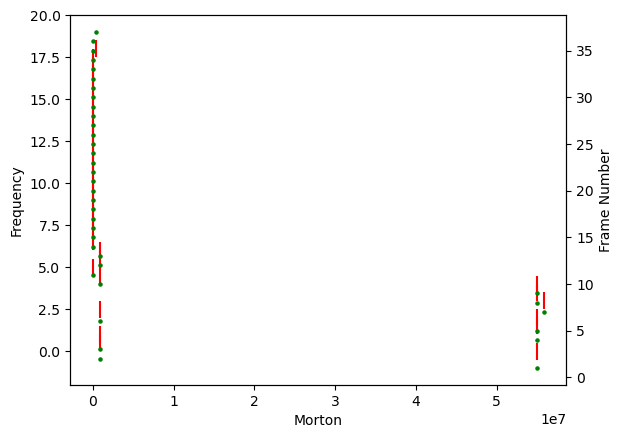

In [19]:
_, ax1 = plt.subplots()
ax1.set_xlabel("Morton")
ax1.set_ylabel("Frequency")
#ax1.set_ylim((0, 1))
mortons_seq = []
for seq in os.listdir(smirk_child):
    print(seq)
    if os.path.isdir(os.path.join(smirk_child, seq)): # reason for this is there is a labels.csv file in /child, need to skip it.
        for anno_frame in sorted(glob.glob(os.path.join(smirk_child, seq, '*.labels.png'))):
            rgb_frame = anno_frame.replace('.labels.png', '.png').replace('../datasets/smirk/child', 'child')
            morton_frame = morton_codes.set_index('frame').loc[rgb_frame].values.astype(float) / 10000
            mortons_seq.append(list(morton_frame))
       
        print(mortons_seq)
        ax1.eventplot(mortons_seq, orientation='horizontal', colors="red",lineoffsets=0.5,linelengths=1)

        ax2 = ax1.twinx()
        for frame_id in range(len(mortons_seq)):
            x=mortons_seq[frame_id]
            y=frame_id+1
            ax2.scatter(x, y, s=5, color='green')
            ax2.set_ylabel("Frame Number")
            
        break

[1.4297140835331202e-09, 9.007199263260704e-08, 9.007199791743008e-08, 9.007234159872e-08, 9.007233622870049e-08, 9.00719980000256e-08, 1.4297087986896002e-09, 1.4077239335526401e-09, 1.4073802522828802e-09, 1.42936511741952e-09, 9.007199263262753e-08, 9.007199791745057e-08, 1.4297140835328e-09, 9.009398286387233e-08, 9.007234151350273e-08, 9.007233622870049e-08, 1.4293705687248e-09, 1.4073802522624002e-09, 2.2333915136320002e-11, 1.42970879737856e-09, 1.42937057003552e-09, 1.42936520001536e-09, 1.407718482248e-09, 9.007234151481345e-08, 1.4297141674192002e-09, 1.42936520132608e-09, 1.4077238496665601e-09, 2.233919864864e-11, 2.2333915156800002e-11, 1.4293651161088e-09, 1.4073802522828802e-09, 1.4077239348432e-09, 1.40772393353248e-09, 9.007199263262753e-08, 1.42971416739872e-09, 1.42971416610816e-09, 1.4077239348432e-09, 1.40771848093728e-09, 1.4077238509568002e-09, 9.007199263260673e-08, 9.007199254740993e-08, 1.40772385095712e-09, 1.40772393355296e-09, 1.4293652013059202e-09, 1.4297

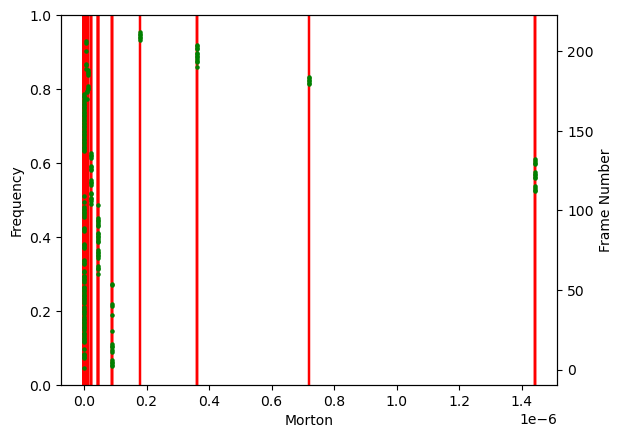

In [86]:
_, ax1 = plt.subplots()
ax1.set_xlabel("Morton")
ax1.set_ylabel("Frequency")
ax1.set_ylim((0, 1))
mortons_seq = []
seq = '9jJxC2pmKULPI8arYKQ5O'
if os.path.isdir(os.path.join(smirk_child, seq)): # reason for this is there is a labels.csv file in /child, need to skip it.
    for anno_frame in sorted(glob.glob(os.path.join(smirk_child, seq, '*.labels.png'))):
        rgb_frame = anno_frame.replace('.labels.png', '.png').replace('../datasets/smirk/child', 'child')
        morton_frame = morton_codes.set_index('frame').loc[rgb_frame].values.astype(float) / 100000000000000000000000
        mortons_seq.append(morton_frame.item())
   
    print(mortons_seq)
    min_morton = min(mortons_seq)
    max_morton = max(mortons_seq)
    for i in mortons_seq:
        norm_morton_seq = [(i - min_morton) / (max_morton - min_morton)] 
    ax1.eventplot(mortons_seq, orientation='horizontal', colors="red",lineoffsets=0.5)

    ax2 = ax1.twinx()
    for frame_id in range(len(mortons_seq)):
        x=mortons_seq[frame_id]
        y=frame_id+1
        ax2.scatter(x, y, s=5, color='green')
        ax2.set_ylabel("Frame Number")
        